# Embedding 레이어
- Embedding 레이어는 주로 자연어 처리에서 사용되며, 자연어를 수치화된 정보로 바꾸기 위한 레이어


- 이미지를 픽셀 단위로 쪼갤 수 있듯 자연어도 정보를 쪼갤 수 있다.
- 영어는 문자, 한글은 문자를 넘어 자소 단위로도 쪼갤 수 있다.
- 딥러닝 기술이 발달한 이후에는 n-gram 보다 단어나 문자 단위의 자연어 처리에 많이 사용 된다.
- 인데스를 사용하는 원-핫 인코딩 방식도 사용할 수 있으나 단점은 사용하는 메모리의 양에 비해 너무 적은 정보량을 표현한다다는 것이다.

In [1]:
import tensorflow as tf

path_to_train_file = tf.keras.utils.get_file('train.txt', 
    'http://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
path_to_test_file =  tf.keras.utils.get_file('test.txt', 
    'http://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

In [2]:
train_text = open(path_to_train_file, 'rb').read().decode(encoding='utf-8')
test_text = open(path_to_test_file, 'rb').read().decode(encoding='utf-8')

In [3]:
print(f'length to text : {len(train_text)} characters')
print(f'length to text : {len(test_text)} characters')

length to text : 6937271 characters
length to text : 2318260 characters


In [4]:
# label : 0 - 부정, 1 - 긍정
print(train_text[:300])

id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843	너무재밓었다그래서보는것을추천한다	0
9045019	교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정	0
6483659	사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다	1
5403919	막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.	0
7797314	원작의


In [5]:
import numpy as np

train_y = np.array([[int(row.split('\t')[2])] 
                    for row in train_text.split('\n')[1:] if row.count('\t') > 0])
test_y = np.array([[int(row.split('\t')[2])] 
                    for row in test_text.split('\n')[1:] if row.count('\t') > 0])

In [6]:
print(train_y.shape, test_y.shape)
print(train_y[:5])

(150000, 1) (50000, 1)
[[0]
 [1]
 [0]
 [0]
 [1]]


In [7]:
train_text_X = [row.split("\t")[1] for row in train_text.split("\n")[1:] if row.count("\t") > 0]
train_text_X[:3]

['아 더빙.. 진짜 짜증나네요 목소리',
 '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다']

In [8]:
import re

def clean_str(string):
    string = re.sub(r'[^가-힣A-Za-z0-9(),!?\'\`]', " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", r" \( ", string)
    string = re.sub(r"\)", r" \) ", string)
    string = re.sub(r"\?", r" \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string.lower()

In [9]:
train_text_X = [clean_str(sentence) for sentence in train_text_X]

In [10]:
train_text_X[:5]

['아 더빙 진짜 짜증나네요 목소리',
 '흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 솔직히 재미는 없다 평점 조정',
 '사이몬페그의 익살스런 연기가 돋보였던 영화 ! 스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다']

In [11]:
sentences = [sentence.split(' ') for sentence in train_text_X]
sentences[:5]

[['아', '더빙', '진짜', '짜증나네요', '목소리'],
 ['흠', '포스터보고', '초딩영화줄', '오버연기조차', '가볍지', '않구나'],
 ['너무재밓었다그래서보는것을추천한다'],
 ['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정'],
 ['사이몬페그의',
  '익살스런',
  '연기가',
  '돋보였던',
  '영화',
  '!',
  '스파이더맨에서',
  '늙어보이기만',
  '했던',
  '커스틴',
  '던스트가',
  '너무나도',
  '이뻐보였다']]

In [12]:
import matplotlib.pyplot as plt

sentence_len = [len(sentence) for sentence in sentences]
sentence_len[:5]

[5, 6, 1, 7, 13]

In [13]:
for i,sentence in enumerate(sentences):
    print(sentence)
    if i == 5:
        break;

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조차', '가볍지', '않구나']
['너무재밓었다그래서보는것을추천한다']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그의', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨에서', '늙어보이기만', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']
['막', '걸음마', '뗀', '3세부터', '초등학교', '1학년생인', '8살용영화', '별반개도', '아까움', '']


In [14]:
sentence_len.sort()

In [15]:
sentence_len[:5]

[1, 1, 1, 1, 1]

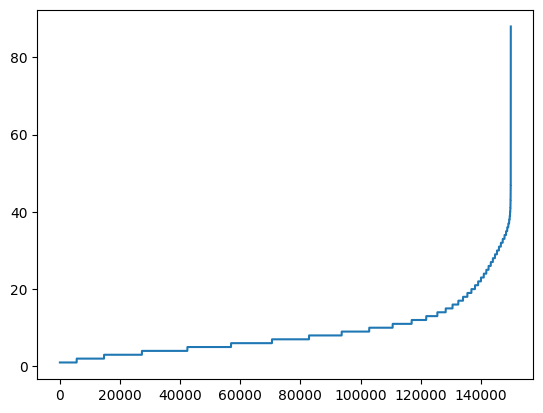

In [16]:
plt.plot(sentence_len)
plt.show()

In [17]:
print(sum(int(l<=25) for l in sentence_len))

142587


In [18]:
sentences[1][:25][:5]

['흠', '포스터보고', '초딩영화줄', '오버연기조차', '가볍지']

In [19]:
sentences[0][:25][:5]

['아', '더빙', '진짜', '짜증나네요', '목소리']

In [20]:
sentence_new = []

for sentence in sentences:
    sentence_new.append([word[:5] for word in sentence][:25])

In [21]:
sentences = sentence_new

In [22]:
sentences[4]

['사이몬페그',
 '익살스런',
 '연기가',
 '돋보였던',
 '영화',
 '!',
 '스파이더맨',
 '늙어보이기',
 '했던',
 '커스틴',
 '던스트가',
 '너무나도',
 '이뻐보였다']

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenizer : 데이터의 모든 단어의 빈도수를 정렬
# num_words : 단어의 수를 제한
# num_words 에 포함되지 않는 값은 0 으로 처리한다.
tokenizer = Tokenizer(num_words=20000)
# fit_on_texts : 실제 데이터 
tokenizer.fit_on_texts(sentences)
# texts_to_sequences : 숫자로 반환
train_X = tokenizer.texts_to_sequences(sentences)
# pad_sequences : 패딩을 pre 앞에 넣고, post 뒤에 넣는다.
# 패딩 : 딥러닝에서는 입력 크기가 고정 되어야 하기 때문에 길이를 맞추기 위해서 사용한다.
train_X = pad_sequences(train_X, padding='post')

print(train_X[:5])

[[   25   884     8  5795  1111     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  588  5796  6697     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [   71   346    31    35 10468     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  106  5338     4     2  2169   869   573     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]]


In [24]:
sentences[0]

['아', '더빙', '진짜', '짜증나네요', '목소리']

In [25]:
tokenizer.index_word[25]

'아'

In [26]:
tokenizer.index_word[884]

'더빙'

In [27]:
tokenizer.index_word[8]

'진짜'

In [28]:
print(tokenizer.index_word[19999])
print(tokenizer.index_word[20000])
print(tokenizer.index_word[20001])

경우는
잊혀질
조잡


In [29]:
temp = tokenizer.texts_to_sequences(['!@#@#', '스트레스를', '경우는', '잊혀질'])
print(temp)

[[], [19998], [19999], []]


In [30]:
temp = pad_sequences(temp, padding='post')
print(temp)

[[    0]
 [19998]
 [19999]
 [    0]]


In [31]:
temp = pad_sequences(temp, padding='pre')
print(temp)

[[    0]
 [19998]
 [19999]
 [    0]]


In [32]:
test = [ [1,2,3], [4,5], [6]]
pad = pad_sequences(test, padding='post')
print(pad)

[[1 2 3]
 [4 5 0]
 [6 0 0]]


In [33]:
test = [ [1,2,3], [4,5], [6]]
pad = pad_sequences(test, padding='pre')
print(pad)

[[1 2 3]
 [0 4 5]
 [0 0 6]]


In [34]:
from tensorflow.keras.layers import Embedding, Input, Dense, LSTM
from tensorflow.keras import models, Sequential

model = Sequential([
    Input(shape=(25,)),
    Embedding(20000, 300),
    LSTM(50),
    Dense(2, activation='softmax')
])

1. sigmoid 
    - 0 ~ 1 사이의 값을 반환
    - 학습 label의 값이 실수로 학습되어야 한다.
    - 결과값을 1개를 반환한다.
    - 손실함수는 binary_crossentropy 를 사용하여 하나의 결과값을 실수로 반환 받는다.
2. softmax
    - 다중 결과값을 반환
    - 여러 개의 값의 label이 category 형태라면 전체 값의 예측 비율을 반환
    - 손실함수는 categorical_crossentropy 를 사용한다.
    - 여러 개의 값의 label이 정수형이라면 전체값의 해당하는 예측 비율을 반환
    - 손실함수는 sparse_categorical_crossentropy 를 사용한다. 

In [35]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 25, 300)        │     6,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 50)             │        70,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,070,302 (23.16 MB)

 Trainable params: 6,070,302 (23.16 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
history = model.fit(train_X, train_y, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5


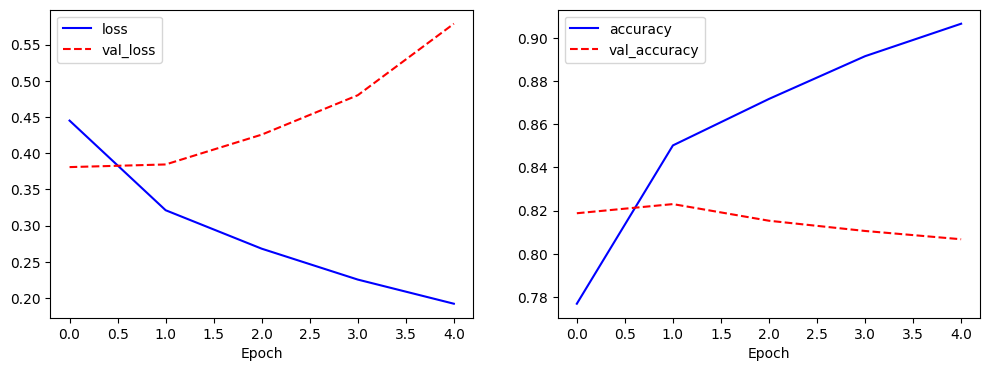

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'b', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [ ]:
test_text_X = [row.split("\t")[1] for row in test_text.split("\n")[1:] if row.count("\t") > 0]
test_text_X = [clean_str(sentence) for sentence in test_text_X]
sentences = [sentence.split(' ') for sentence in test_text_X]

sentence_new = []

for sentence in sentences:
    sentence_new.append([word[:5] for word in sentence][:25])

sentences = sentence_new

test_X = tokenizer.texts_to_sequences(sentences)
test_X = pad_sequences(test_X, padding='post')

model.evaluate(test_X, test_y, verbose=0)

[0.582836389541626, 0.8024399876594543]

In [ ]:
test_sentence = '재미있을 줄 알았는데 완전 실망했다. 처음에 재밌고 나중에 너무 졸리고 돈이 아까웠다.'
test_sentence = test_sentence.split(' ')

test_sentences = []
now_sentence = []

for word in test_sentence:
    now_sentence.append(word)
    test_sentences.append(now_sentence[:])

test_X_1 = tokenizer.texts_to_sequences(test_sentences)
test_X_1 = pad_sequences(test_X_1, padding="post", maxlen=25)
pred = model.predict(test_X_1)

for idx, sentence in enumerate(test_sentences):
    print(sentence)
    print(pred[idx])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
['재미있을']
[0.33814007 0.66185987]
['재미있을', '줄']
[0.45369536 0.54630464]
['재미있을', '줄', '알았는데']
[0.52152526 0.47847468]
['재미있을', '줄', '알았는데', '완전']
[0.5038646 0.4961354]
['재미있을', '줄', '알았는데', '완전', '실망했다.']
[0.5038646 0.4961354]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '처음에']
[0.20459558 0.79540443]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '처음에', '재밌고']
[0.04320537 0.9567946 ]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '처음에', '재밌고', '나중에']
[0.04240344 0.95759654]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '처음에', '재밌고', '나중에', '너무']
[0.01689387 0.9831062 ]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '처음에', '재밌고', '나중에', '너무', '졸리고']
[0.7411372  0.25886282]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '처음에', '재밌고', '나중에', '너무', '졸리고', '돈이']
[0.9898582  0.01014179]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '처음에', '재밌고', '나중에', '너무', '졸리고', '돈이', '아까웠다.']
[0.9898582  0.01014179]
